# Scipy - High-Level Scientific Computing
__Authors:__ _Adrien Chauve, Andre Espaze, Emmanuelle Gouillart, Gaël Varoquaux, Ralf Gommers_
## Scipy
The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc.

`Scipy` can be compared to other standard scientific-computing libraries, such as the GSL (_GNU Scientific Library_ for `C` and `C++`), or `Matlab`’s toolboxes. `Scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that `numpy` and `scipy` work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in `Scipy`. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, `Scipy`‘s routines are optimized and tested, and should therefore be used when possible.

`scipy` is composed of task-specific sub-modules:

Sub-module | Description
--- | ---
[`scipy.cluster`](http://docs.scipy.org/doc/scipy/reference/cluster.html#module-scipy.cluster) | Vector quantization / Kmeans
[`scipy.constants`](http://docs.scipy.org/doc/scipy/reference/constants.html#module-scipy.constants) | Physical and mathematical constants
[`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) | Fourier transform
[`scipy.integrate`](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) | Integration routines
[`scipy.interpolate`](http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) | Interpolation
[`scipy.io`](http://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io) | Data input and output
[`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) | Linear algebra routines
[`scipy.ndimage`](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage) | n-dimensional image package
[`scipy.odr`](http://docs.scipy.org/doc/scipy/reference/odr.html#module-scipy.odr) | Orthogonal distance regression
[`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) | Optimization
[`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) | Signal processing
[`scipy.sparse`](http://docs.scipy.org/doc/scipy/reference/sparse.html#module-scipy.sparse) | Sparse matrices
[`scipy.spatial`](http://docs.scipy.org/doc/scipy/reference/spatial.html#module-scipy.spatial) | Spatial data structures and algorithms
[`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) | Any special mathematical functions
[`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) | Statistics

They all depend on numpy, but are mostly independent of each other. The standard way of importing `Numpy` and these `Scipy` modules is:

In [1]:
import numpy as np
from scipy import stats  # same for other sub-modules

The main scipy namespace mostly contains functions that are really `numpy` functions (try `scipy.cos` is `np.cos`). Those are exposed for historical reasons only; there’s usually no reason to use `import scipy` in your code.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 1. File input/output: [`scipy.io`](http://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io)
* Loading and saving `Matlab` files:

In [ ]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

* Reading images:

In [ ]:
from scipy import misc
misc.imread('images/fname.png')    

# Matplotlib also has a similar function
import matplotlib.pyplot as plt
plt.imread('images/fname.png')

See also:
* Load text files: [`numpy.loadtxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt)/[`numpy.savetxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt)
* Clever loading of text/csv files: [`numpy.genfromtxt()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt)/`numpy.recfromcsv()`
* Fast and efficient, but numpy-specific, binary format: [`numpy.save()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html#numpy.save)/[`numpy.load()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html#numpy.load)

## 2. Special functions: [`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)
Special functions are transcendental functions. The docstring of the [`scipy.special`](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special) module is well-written, so we won’t list all functions here. Frequently used ones are:
* Bessel function, such as `scipy.special.jn()` (nth integer order Bessel function)
* Elliptic function (`scipy.special.ellipj()` for the Jacobian elliptic function, ...)
* Gamma function: `scipy.special.gamma()`, also note `scipy.special.gammaln()` which will give the log of Gamma to a higher numerical precision.
* Erf, the area under a Gaussian curve: `scipy.special.erf()`

## 3. Linear algebra operations: [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg)
The [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg) module provides standard linear algebra operations, relying on an underlying efficient implementation (`BLAS`, `LAPACK`).

* The [`scipy.linalg.det()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.det.html#scipy.linalg.det) function computes the determinant of a square matrix:

In [ ]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr)

linalg.det(np.ones((3, 4)))


* The [`scipy.linalg.inv()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv) function computes the inverse of a square matrix:


In [ ]:
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr


np.allclose(np.dot(arr, iarr), np.eye(2))


&nbsp;&nbsp;&nbsp;&nbsp;Finally computing the inverse of a singular matrix (its determinant is zero) will raise `LinAlgError`:


In [ ]:
arr = np.array([[3, 2],
                [6, 4]])
linalg.inv(arr)


* More advanced operations are available, for example singular-value decomposition (SVD):


In [ ]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

&nbsp;&nbsp;&nbsp;&nbsp;The resulting array spectrum is:

In [ ]:
spec

&nbsp;&nbsp;&nbsp;&nbsp;The original matrix can be re-composed by matrix multiplication of the outputs of `svd` with `np.dot`:

In [ ]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

SVD is commonly used in statistics and signal processing. Many other standard decompositions (QR, LU, Cholesky, Schur), as well as solvers for linear systems, are available in [`scipy.linalg`](http://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg).

## 4. Fast Fourier transforms: [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack)
The [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack) module allows to compute _fast Fourier transforms_. As an illustration, a (noisy) input signal may look like:

In [ ]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

The observer doesn’t know the signal frequency, only the sampling time step of the signal `sig`. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The [`scipy.fftpack.fftfreq()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fftfreq.html#scipy.fftpack.fftfreq) function will generate the sampling frequencies and [`scipy.fftpack.fft()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html#scipy.fftpack.fft) will compute the fast Fourier transform:

In [ ]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [ ]:
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

In [ ]:
%matplotlib inline

In [ ]:
import pylab as plt

plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.show()

The signal frequency can be found by:

In [ ]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)  # check that correct freq is found

Now the high-frequency noise will be removed from the Fourier transformed signal:

In [ ]:
sig_fft[np.abs(sample_freq) > freq] = 0

The resulting filtered signal can be computed by the [`scipy.fftpack.ifft()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html#scipy.fftpack.ifft) function:

In [ ]:
main_sig = fftpack.ifft(sig_fft)

The result can be viewed with:

In [ ]:
plt.figure()    
plt.plot(time_vec, sig)    
plt.plot(time_vec, main_sig, linewidth=3)    
plt.xlabel('Time [s]')    
plt.ylabel('Amplitude')
plt.show()

Numpy also has an implementation of FFT ([`numpy.fft`](http://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft)). However, in general the `scipy` one should be preferred, as it uses more efficient underlying implementations.

### 4.1 Worked Example: Crude periodicity finding

In [ ]:
"""
Discover the periods in data/populations.txt
"""

data = np.loadtxt('data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]

ft_populations = np.fft.fft(populations, axis=0)
frequencies = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

### 4.2 Worked example: Gaussian image blur
Convolution:
<img src="images/conv1.png" />
<img src="images/conv2.png" />

In [ ]:
"""
Simple image blur by convolution with a Gaussian kernel
"""

# read image
img = plt.imread('data/elephant.png')

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.imshow(img2)
plt.show()

# Further exercise (only if you are familiar with this stuff):
#
# A "wrapped border" appears in the upper left and top edges of the
# image. This is because the padding is not done correctly, and does
# not take the kernel size into account (so the convolution "flows out
# of bounds of the image").  Try to remove this artifact.


### 4.3 Exercise: Denoise moon landing image
<img src="data/moonlanding.png" />
1. Examine the provided image moonlanding.png, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
2. Load the image using `pylab.imread()`.
3. Find and use the 2-D FFT function in [`scipy.fftpack`](http://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack), and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
4. The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
5. Apply the inverse Fourier transform to see the resulting image.

## 5. Optimization and Fit: [`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize)
_Optimization_ is the problem of finding a numerical solution to a minimization or equality.
The [`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) module provides useful algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.

In [ ]:
from scipy import optimize

### 5.1. Finding the Minimum of a Scalar Function

Let’s define the following function:

In [ ]:
def f(x):
    return x**2 + 10*np.sin(x)

and plot it:

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

This function has a _global minimum_ around -1.3 and a _local minimum_ around 3.8.

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The [_BFGS algorithm_](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.optimize.fmin_bfgs.html) is a good way of doing this:

In [ ]:
optimize.fmin_bfgs(f, 0)

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point:

In [ ]:
optimize.fmin_bfgs(f, 3, disp=0)

If we don’t know the neighborhood of the global minimum to choose the initial point, we need to resort to costlier global optimization. To find the global minimum, we use [`scipy.optimize.basinhopping()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html#scipy.optimize.basinhopping) (which combines a local optimizer with _stochastic sampling_ of starting points for the local optimizer):

_New in version 0.12.0_: basinhopping was added in version 0.12.0 of Scipy

In [ ]:
optimize.basinhopping(f, 0)

Another available (but much less efficient) global optimizer is [`scipy.optimize.brute()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html#scipy.optimize.brute) (brute force optimization on a grid). More efficient algorithms for different classes of global optimization problems exist, but this is out of the scope of scipy. Some useful packages for global optimization are [OpenOpt](https://pypi.python.org/pypi/openopt/0.5501), [IPOPT](https://github.com/xuy/pyipopt), [PyGMO](http://esa.github.io/pygmo/) and [PyEvolve](http://pyevolve.sourceforge.net/).

To find the _local minimum_, let’s constraint the variable to the interval (0, 10) using [`scipy.optimize.fminbound()`]():

In [ ]:
xmin_local = optimize.fminbound(f, 0, 10)
xmin_local

### 5.2. Finding the roots of a scalar function

To find a root, i.e. a point where `f(x) = 0`, of the function f above we can use for example [`scipy.optimize.fsolve()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve):

In [ ]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

Note that only one root is found. Inspecting the plot of `f` reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess:

In [ ]:
root2 = optimize.fsolve(f, -2.5)
root2

### 5.3. Curve Fitting

Suppose we have data sampled from `f` with some noise:

In [ ]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

Now if we know the functional form of the function from which the samples were drawn (`x^2 + sin(x)` in this case) but not the _amplitudes_ of the terms, we can find those by _least squares_ curve fitting. First we have to define the function to fit:

In [ ]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use [`scipy.optimize.curve_fit()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) to find `a` and `b`:

In [ ]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

Now we have found the minima and roots of `f` and used curve fitting on it, we put all those resuls together in a single plot:

In [ ]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # our initial guess is 1
root2 = optimize.fsolve(f, -2.5)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

__Note__ In Scipy >= 0.11 unified interfaces to all minimization and root finding algorithms are available: [`scipy.optimize.minimize()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize), [`scipy.optimize.minimize_scalar()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) and [`scipy.optimize.root()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root). They allow comparing various algorithms easily through the `method` keyword.

You can find algorithms with the same functionalities for multi-dimensional problems in [`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize).

<div style="background-color:rgba(0, 255, 0, 0.1); padding:10px;">
<h3>Exercise: Curve Fitting of Temperature Data</h3>
<div style="padding:20px;">
<p>The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):</p>
<code>
max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18
min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
</code>
<ol>
<li>Plot these temperature extremes.</li>
<li>Define a function that can describe min and max temperatures. Hint: this function has to have a period of 1 year. Hint: include a time offset.</li>
<li>Fit this function to the data with <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit">scipy.optimize.curve_fit()</a>.</li>
<li>Plot the result. Is the fit reasonable? If not, why?</li>
<li>Is the time offset for min and max temperatures the same within the fit accuracy?</li>
</ol>
</div>
</div>

<div style="background-color:rgba(0, 255, 0, 0.1); padding:10px;">
<h3>Exercise: 2-D minimization</h3>
<img src="images/scipy_optimize_sixhump.png" alt="sixhump plot">
<div style="padding:20px;">
<p>The six-hump camelback function</p>
<img src="images/sixhump_formula.png" alt="sixhump formula">
<p>has multiple global and local minima. Find the global minima of this function.</p>
<h4>Hints:</h4>
<ul>
<li>Variables can be restricted to <code>-2 &lt; x &lt; 2</code> and <code>-1 &lt; y &lt; 1.</code></li>
<li>Use <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html#numpy.meshgrid">numpy.meshgrid()</a> and <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow">pylab.imshow()</a> to find visually the regions.</li>
<li>Use <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html#scipy.optimize.fmin_bfgs">scipy.optimize.fmin_bfgs()</a> or another multi-dimensional minimizer.</li>
<p>How many global minima are there, and what is the function value at those points? What happens for an initial guess of (x, y) = (0, 0)?</p>
</ul>
</div>
</div>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

plt.figure()  # simple visualization for use in tutorial
plt.imshow(sixhump([xg, yg]))
plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

plt.show()

## 6. Statistics and Random Numbers: [`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)
The module [`scipy.stats`](http://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) contains statistical tools and probabilistic descriptions of random processes. Random number generators for various random process can be found in [`numpy.random`](http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

### 6.1. Histogram and Probability Density Function

Given observations of a random process, their histogram is an estimator of the random process’s _PDF_ (_probability density function_):

In [4]:
a = np.random.normal(size=1000)
bins = np.arange(-4, 5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [5]:
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

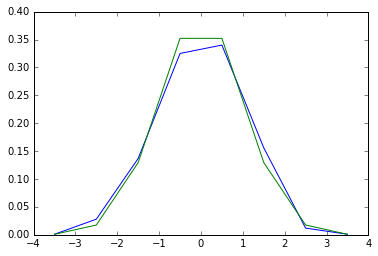

In [6]:
from scipy import stats
b = stats.norm.pdf(bins)  # norm is a distribution

plt.plot(bins, histogram) 
plt.plot(bins, b)

plt.show()

In [ ]:
a = np.random.normal(size=10000)
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(a, bins=bins, normed=True)
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.norm.pdf(bins)
plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

If we know that the random process belongs to a given family of random processes, such as normal processes, we can do a _maximum-likelihood fit_ of the observations to estimate the parameters of the underlying distribution. Here we fit a normal process to the observed data:

In [7]:
loc, std = stats.norm.fit(a)
loc

-0.023142250113027136

In [8]:
std

1.0075627000317526

<div style="background-color:rgba(0, 255, 0, 0.1); padding:10px;">
<h3>Exercise: Probability Distributions</h3>
<div style="padding:20px;">
<p>Generate 1000 random variates from a gamma distribution with a shape parameter of 1, then plot a histogram from those samples. Can you plot the pdf on top (it should match)?</p>
<p>Extra: the distributions have a number of useful methods. Explore them by reading the docstring or by using IPython tab completion. Can you find the shape parameter of 1 back by using the fit method on your random variates?</p>
</div>
</div>

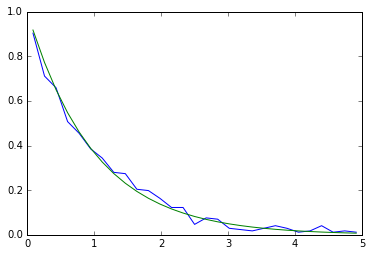

In [9]:
#Gamma distribution

a = np.random.gamma(1, size = 1000)
bins = np.linspace(0, 5, 30)
histogram, bins = np.histogram(a, bins=bins, normed=True)
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf(bins,1)
plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

## 6.2. Percentiles
The _median_ is the value with half of the observations below, and half above:

In [10]:
np.median(a)

0.74053327743558484

It is also called the _percentile 50_, because 50% of the observation are below it:

In [11]:
stats.scoreatpercentile(a, 50)

0.74053327743558484

Similarly, we can calculate the _percentile 90_:

In [12]:
stats.scoreatpercentile(a, 90)

2.2852766073957227

The percentile is an estimator of the _CDF: cumulative distribution function_.

## 6.3. Statistical Tests
A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a [T-test](https://en.wikipedia.org/wiki/Student%27s_t-test) to decide whether the two sets of observations are significantly different:

In [13]:
a = np.random.normal(0, 1, size=100)
b = np.random.normal(1, 1, size=10)
stats.ttest_ind(a, b)

(-2.6687241308381373, 0.0087880244611886048)

The resulting output is composed of:
* The _T statistic value_: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
* The _p value_: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.

## 7. Interpolation: [`scipy.interpolate`](http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)

The [`scipy.interpolate`](http://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate) is useful for fitting a function from experimental data and thus evaluating points where no measure exists. The module is based on the [FITPACK Fortran subroutines](http://www.netlib.org/dierckx/index.html) from the [netlib](http://www.netlib.org/) project.

By imagining experimental data close to a sine function:

In [14]:
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

The [`scipy.interpolate.interp1d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) class can build a linear interpolation function:

In [15]:
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measures)

Then the `scipy.interpolate.linear_interp` instance needs to be evaluated at the time of interest:

In [16]:
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

A cubic interpolation can also be selected by providing the `kind` optional keyword argument:

In [17]:
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

The results are now gathered on the following `Matplotlib` figure:

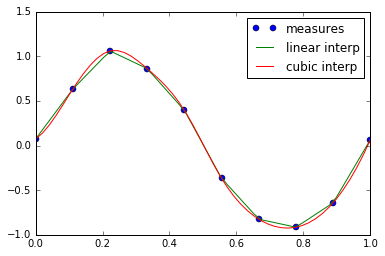

In [18]:
plt.plot(measured_time, measures, 'o', ms=6, label='measures')
plt.plot(computed_time, linear_results, label='linear interp')
plt.plot(computed_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

[`scipy.interpolate.interp2d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d) is similar to [`scipy.interpolate.interp1d`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp2d.html#scipy.interpolate.interp2d), but for 2-D arrays. Note that for the interp family, the computed time must stay within the measured time range.

## 8. Numerical Integration: [`scipy.integrate`](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate)

The most generic integration routine is [`scipy.integrate.quad()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad):

In [19]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)
np.allclose(res, 1)

np.allclose(err, 1 - res)

True

Other integration schemes are available with `fixed_quad`, `quadrature`, `romberg`.

[`scipy.integrate`](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) also features routines for integrating _Ordinary Differential Equations (ODE)_. In particular, [`scipy.integrate.odeint()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) is a general-purpose integrator using LSODA (Livermore Solver for Ordinary Differential equations with Automatic method switching for stiff and non-stiff problems), see the [ODEPACK Fortran library](http://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html) for more details.

`odeint` solves first-order ODE systems of the form:

$$dy/dt = rhs(y1, y2, .., t0,...)$$

As an introduction, let us solve the ODE `dy/dt = -2y` between `t = 0..4`, with the initial condition `y(t=0) = 1`. First the function computing the derivative of the position needs to be defined:

In [20]:
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2 * ypos

An extra argument `counter_arr` has been added to illustrate that the function may be called several times for a single time step, until solver convergence. The counter array is defined as:

In [21]:
counter = np.zeros((1,), dtype=np.uint16)

The trajectory will now be computed:

In [22]:
from scipy.integrate import odeint
time_vec = np.linspace(0, 4, 40)
yvec, info = odeint(calc_derivative, 1, time_vec,
                    args=(counter,), full_output=True)

Thus the derivative function has been called more than 40 times (which was the number of time steps):

In [23]:
counter

array([129], dtype=uint16)

and the cumulative number of iterations for each of the 10 first time steps can be obtained by:

In [24]:
info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

Note that the solver requires more iterations for the first time step. The solution `yvec` for the trajectory can now be plotted:

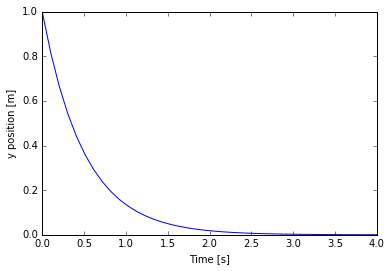

In [25]:
plt.plot(time_vec, yvec)
plt.xlabel('Time [s]')
plt.ylabel('y position [m]')
plt.show()

Another example with [`scipy.integrate.odeint()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) will be a damped spring-mass oscillator (2nd order oscillator). The position of a mass attached to a spring obeys the 2nd order ODE `y'' + 2 eps wo  y' + wo^2 y = 0` with `wo^2 = k/m` with `k` the spring constant, `m` the mass and `eps=c/(2 m wo)` with `c` the damping coefficient. For this example, we choose the parameters as:

In [26]:
mass = 0.5  # kg
kspring = 4  # N/m
cviscous = 0.4  # N s/m

so the system will be underdamped, because:

In [27]:
eps = cviscous / (2 * mass * np.sqrt(kspring/mass))
eps < 1

True

For the [`scipy.integrate.odeint()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint) solver the 2nd order equation needs to be transformed in a system of two first-order equations for the vector `Y=(y, y')`. It will be convenient to define `nu = 2 eps * wo = c / m` and `om = wo^2 = k/m`:

In [28]:
nu_coef = cviscous / mass
om_coef = kspring / mass

Thus the function will calculate the velocity and acceleration by:

In [29]:
def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc * yvec[1] - omc * yvec[0])

time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

The final position and velocity are shown on the following `Matplotlib` figure:

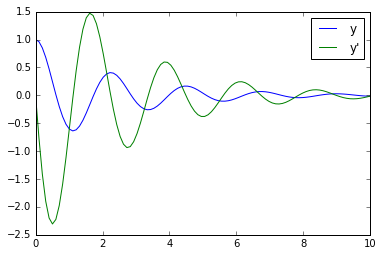

In [30]:
plt.plot(time_vec, yarr[:, 0], label='y')
plt.plot(time_vec, yarr[:, 1], label="y'")
plt.legend()
plt.show()

There is no _Partial Differential Equations (PDE)_ solver in `Scipy`. Some Python packages for solving PDE’s are available, such as [`fipy`](http://www.ctcms.nist.gov/fipy/) or [`SfePy`](http://code.google.com/p/sfepy/).

## 9. Signal Processing: [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal)

In [31]:
from scipy import signal

* [`scipy.signal.detrend()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html#scipy.signal.detrend): remove linear trend from signal:

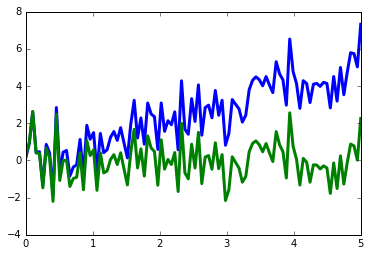

In [32]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

plt.plot(t, x, linewidth=3) 
plt.plot(t, signal.detrend(x), linewidth=3) 

plt.show()

* [`scipy.signal.resample()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html#scipy.signal.resample): resample a signal to n points using FFT.

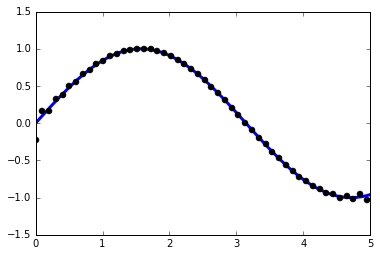

In [33]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

plt.plot(t, x, linewidth=3) 
plt.plot(t[::2], signal.resample(x, 50), 'ko') 

plt.show()

* [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) has many window functions: [`scipy.signal.hamming()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hamming.html#scipy.signal.hamming), [`scipy.signal.bartlett()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bartlett.html#scipy.signal.bartlett), [`scipy.signal.blackman()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.blackman.html#scipy.signal.blackman)...
* [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) has filtering (median filter [`scipy.signal.medfilt()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html#scipy.signal.medfilt), Wiener [`scipy.signal.wiener()`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html#scipy.signal.wiener)), but we will discuss this in the image section.

## 10. Image Processing: [`scipy.ndimage`](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)

### 10.1 Opening and Writing to Image Files

Writing an array to a file:

In [34]:
from scipy import misc
face = misc.face()
misc.imsave('face.png', face) # uses the Image module (PIL)

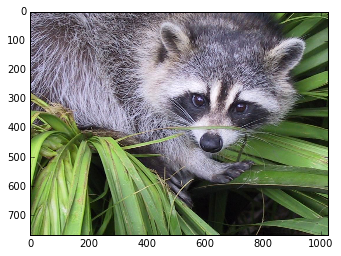

In [35]:
plt.imshow(face)
plt.show()

Creating a numpy array from an image file:

In [36]:
face = misc.imread('face.png')
type(face)

numpy.ndarray

In [37]:
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

`dtype` is `uint8` for 8-bit images (0-255)

Opening raw files (camera, 3-D images)

In [38]:
face.tofile('face.raw') # Create raw file
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
face_from_raw.shape

(2359296,)

Need to know the `shape` and `dtype` of the image (how to separate data bytes).

In [39]:
face_from_raw.shape = (768, 1024, 3)

For large data, use `np.memmap` for memory mapping:

In [40]:
face_memmap = np.memmap('face.raw', dtype=np.uint8, shape=(768, 1024, 3))

(data are read from the file, and not loaded into memory)

Working on a list of image files

In [42]:
for i in range(10):
    im = np.random.random_integers(0, 255, 10000).reshape((100, 100))
    misc.imsave('random_%02d.png' % i, im)

from glob import glob
filelist = glob('random*.png')
filelist.sort()

### 10.2. Displaying Images

Use `matplotlib` and `imshow` to display an image inside a `matplotlib` figure:

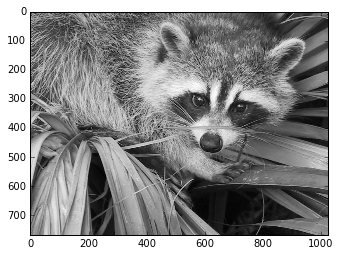

In [43]:
f = misc.face(gray=True)  # retrieve a grayscale image
plt.imshow(f, cmap=plt.cm.gray) 
plt.show()

Increase contrast by setting min and max values:

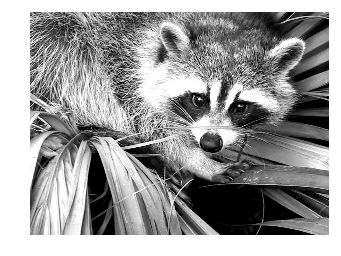

In [44]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)        

# Remove axes and ticks
plt.axis('off')

plt.show()

### 10.3. Basic Manipulations

Images are arrays: use the whole `numpy` machinery.

In [45]:
face = misc.face(gray=True)
face[0, 40]

127

In [46]:
# Slicing
face[10:13, 20:23]

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

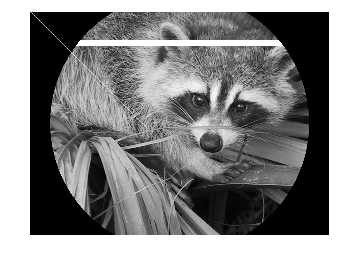

In [47]:
face[100:120] = 255

lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
# Masks
face[mask] = 0
# Fancy indexing
face[range(400), range(400)] = 255

plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#### 10.3.1. Statistical Information

In [48]:
face = misc.face(gray=True)
face.mean()

113.48026784261067

In [49]:
face.max(), face.min()

(250, 0)

### 10.4. Image Processing using [`scipy.ndimage`](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage)

The submodule dedicated to image processing in scipy is [`scipy.ndimage`](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage).

In [50]:
from scipy import ndimage

Image processing routines may be sorted according to the category of processing they perform.

#### 10.4.1. Geometrical Transformations on Images

Changing orientation, resolution, ..

In [51]:
from scipy import misc

face = misc.face(gray=True)
lx, ly = face.shape
# Cropping
crop_face = face[lx/4:-lx/4, ly/4:-ly/4]
# up <-> down flip
flip_ud_face = np.flipud(face)
# rotation
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)

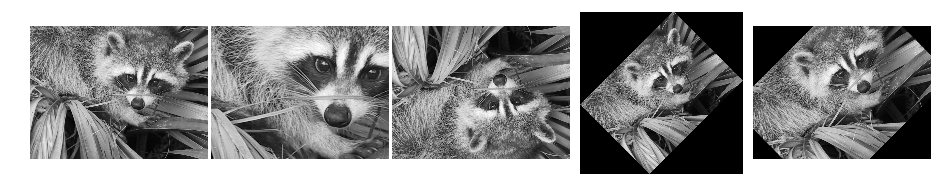

In [52]:
plt.figure(figsize=(12.5, 2.5))


plt.subplot(151)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(152)
plt.imshow(crop_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(153)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(154)
plt.imshow(rotate_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(155)
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0,
                    right=1)

plt.show()

#### 10.4.2. Image Filtering

In [53]:
face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
from scipy import signal
wiener_face = signal.wiener(noisy_face, (5, 5))

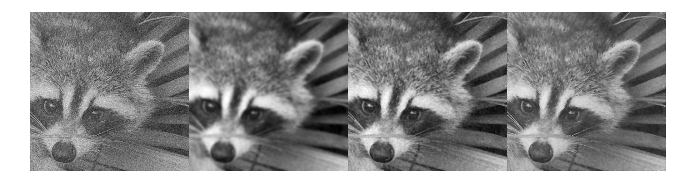

In [54]:
plt.figure(figsize=(9, 3))

plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

Many other filters in [`scipy.ndimage.filters`](http://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage.filters) and [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) can be applied to images.

<div style="background-color:rgba(0, 255, 0, 0.1); padding:10px;">
<h3>Exercise</h3>
<div style="padding:20px;">
<p>Compare histograms for the different filtered images.</p>
</div>
</div>

In [55]:

bins = np.linspace(0, 250, 250)
histogram, bins = np.histogram(noisy_face, bins=bins, normed=True)
bins = 0.5*(bins[1:] + bins[:-1])